In [10]:
import matplotlib.pyplot as plt
import numpy as np
import math 
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


data_bunch = datasets.load_diabetes(return_X_y=False, as_frame=False)
diabetes_X = data_bunch ['data']
diabetes_label = data_bunch ['target']
diabetes_age = diabetes_X[:, np.newaxis, 0]
diabetes_bp = diabetes_X[:, np.newaxis, 3]
diabetes_s4 = diabetes_X[:, np.newaxis, 7]
diabetes_s6 = diabetes_X[:, np.newaxis, 9]
print("Data description: \n", data_bunch['DESCR'])

Data description: 
 .. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

N

In [14]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_age, diabetes_s4)
diabetes_y_fitted = regr.predict(diabetes_age)

print("R^2:", regr.score(diabetes_age, diabetes_s4))

R^2: 0.04155111240222842


In [15]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_bp, diabetes_s4)
diabetes_y_fitted = regr.predict(diabetes_bp)

print("R^2:", regr.score(diabetes_bp, diabetes_s4))

R^2: 0.06638354995699813


In [21]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_s6[:-20]
diabetes_X_test = diabetes_s6[-20:]

# Split the data into training/testing sets
diabetes_y_train = diabetes_label[:-20]
diabetes_y_test = diabetes_label[-20:]

regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)
print("Score: ", regr.score(diabetes_X_train, diabetes_y_train))
#score is the coefficient of determination
#score is close to 1 if residual error total is 0. 

#ex. for y = mx+b, coef = [m], intercept = b. 
#ex. for y = ax^2 + b^x + c, coef = [a, b], intercept = c.
print("Coefficients: ", regr.coef_)  
print("Intercept: ", regr.intercept_)
print("m = ", regr.coef_[0], "b = ", regr.intercept_)
print("R^2 = %.2f" % regr.score(diabetes_X_train, diabetes_y_train))
print("Predicted value for x = 3: ", regr.predict(np.array([[3]]))) 

diabetes_y_fitted = regr.predict(diabetes_X_test)
print("R^2 = %.2f" % r2_score(diabetes_y_test, diabetes_y_fitted))

Score:  0.15013340519940488
Coefficients:  [630.53662695]
Intercept:  153.65837014587217
m =  630.5366269472346 b =  153.65837014587217
R^2 = 0.15
Predicted value for x = 3:  [2045.26825099]
R^2 = -10621211.93


In [25]:
diabetes_y_fitted = regr.predict(diabetes_X_test)
print("R^2 = %.2f" % r2_score(diabetes_y_test, diabetes_y_fitted))

R^2 = -0.09


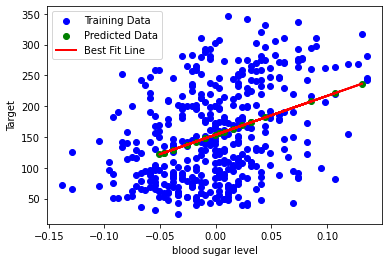

In [23]:
# Plot training data
plt.scatter(diabetes_X_train, diabetes_y_train, color='blue', label='Training Data')

# Plot predicted data
plt.scatter(diabetes_X_test, diabetes_y_fitted, color='green', label='Predicted Data')

# Plot best fit line
plt.plot(diabetes_X_test, diabetes_y_fitted, color='red', linewidth=2, label='Best Fit Line')

plt.xlabel('blood sugar level')
plt.ylabel('Target')
plt.legend()
plt.show()